<a href="https://colab.research.google.com/github/Djaxis/LA-PLATEFORME/blob/main/stroke_alert_brice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inroduction

# Analyse exploratoire des données (EDA)

In [ ]:
! pip install statsmodels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from statsmodels.api import OLS



In [ ]:
import pandas as pd
# Afficher un aperçu des données
healthcare_df = pd.read_csv(".\healthcare-dataset-stroke-data.csv", delimiter=",")
healthcare_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


Objectif : Étudier les facteurs de risque d'accident vasculaire cérébral (AVC).
Voici comment chaque colonne pourrait être utile :

- `gender` : Cette colonne peut aider à déterminer si le genre d'une personne a une influence sur la probabilité d'avoir un AVC.
- `age` : L'âge est un facteur de risque important pour les AVC. Plus une personne est âgée, plus le risque d'AVC est élevé.
- `hypertension` : L'hypertension est un facteur de risque connu pour les AVC. Cette colonne indique si une personne souffre d'hypertension.
- `heart_disease` : Tout comme l'hypertension, les maladies cardiaques peuvent augmenter le risque d'AVC. Cette colonne indique si une personne a une maladie cardiaque.
- `ever_married` : Le statut matrimonial peut avoir un impact sur la santé d'une personne, y compris le risque d'AVC.
- `work_type` : Le type de travail peut influencer le niveau de stress et l'activité physique, qui sont tous deux liés au risque d'AVC.
- `Residence_type` : Le type de résidence peut refléter des facteurs environnementaux qui pourraient influencer le risque d'AVC.
- `avg_glucose_level` : Le niveau moyen de glucose dans le sang peut être un indicateur de risque d'AVC, car un taux élevé de glucose dans le sang peut endommager les vaisseaux sanguins.
- `bmi` : L'Indice de Masse Corporelle (IMC) est une grandeur qui permet d'estimer la corpulence d’une personne. Un IMC élevé peut indiquer un surpoids ou une obésité, qui sont des facteurs de risque pour les AVC.
- `smoking_status` : Le tabagisme est un facteur de risque bien connu pour de nombreuses maladies, y compris les AVC.
- `stroke` : Cette colonne indique si une personne a déjà eu un AVC. C'est généralement la variable cible dans une tâche de prédiction.

L'objectif est de développer un modèle prédictif pour identifier les personnes à haut risque d'AVC en fonction de leurs caractéristiques personnelles et de leur mode de vie. Ce modèle pourrait être utilisé pour cibler les interventions de prévention et réduire le fardeau des AVC.

In [ ]:
print('QUESTION 2 : Analysez l’ordre de grandeur et l’unité des différentes données.')
healthcare_df.dtypes

QUESTION 2 : Analysez l’ordre de grandeur et l’unité des différentes données.


id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

## QUESTION 2 : Analysez l’ordre de grandeur et l’unité des différentes données.
# A - Analyse brut des colonnes


1. **id (int64):**
   - Ordre de grandeur : Entiers
   - Unité : Aucune unité spécifique, c'est probablement un identifiant unique.

2. **gender (object):**
   - Ordre de grandeur : Catégorique (par exemple, homme, femme, autre)
   - Unité : Catégorie

3. **age (float64):**
   - Ordre de grandeur : Entiers ou décimaux
   - Unité : Années

4. **hypertension (int64):**
   - Ordre de grandeur : 0 ou 1 (binaire)
   - Unité : Présence (1) ou absence (0) d'hypertension

5. **heart_disease (int64):**
   - Ordre de grandeur : 0 ou 1 (binaire)
   - Unité : Présence (1) ou absence (0) de maladie cardiaque

6. **ever_married (object):**
   - Ordre de grandeur : Catégorique (par exemple, oui, non)
   - Unité : Catégorie

7. **work_type (object):**
   - Ordre de grandeur : Catégorique (par exemple, privé, gouvernement, autonome)
   - Unité : Catégorie

8. **Residence_type (object):**
   - Ordre de grandeur : Catégorique (par exemple, urbain, rural)
   - Unité : Catégorie

9. **avg_glucose_level (float64):**
   - Ordre de grandeur : Décimaux
   - Unité : Niveau moyen de glucose dans le sang (peut-être en mg/dL ou mmol/L)

10. **bmi (float64):**
    - Ordre de grandeur : Décimaux
    - Unité : Indice de masse corporelle (BMI)

11. **smoking_status (object):**
    - Ordre de grandeur : Catégorique (par exemple, jamais fumé, fumeur actuel, fumeur passé)
    - Unité : Catégorie

12. **stroke (int64):**
    - Ordre de grandeur : 0 ou 1 (binaire)
    - Unité : Présence (1) ou absence (0) d'accident vasculaire cérébral

Après avoir identifié ces informations, vous pouvez prendre plusieurs mesures :

1. **Nettoyage des données :**
2. **Conversion des types de données :**
3. **Exploration des données :**

4. **Préparation des données :**
5. **Choix des analyses spécifiques :** En fonction des objectifs de votre analyse, choisissez les méthodes d'analyse statistique ou d'apprentissage automatique

In [ ]:
healthcare_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


- Un niveau de glucose dans le sang de 271.74 mg/dL (milligrammes par décilitre) serait considéré comme élevé et pourrait indiquer une hyperglycémie.

- Un niveau de glucose dans le sang de 55.12 mg/dL serait considéré comme relativement bas et pourrait indiquer une hypoglycémie.

- L'âge moyen est de 43 ans, la personne la plus âgée a 82 ans et l'individu le plus jeune a 0.08 ans soit environ 2 jours.

DETECTION DES VALEURS MANQUANTES VIA UN HISTOGRAMME


<Axes: >

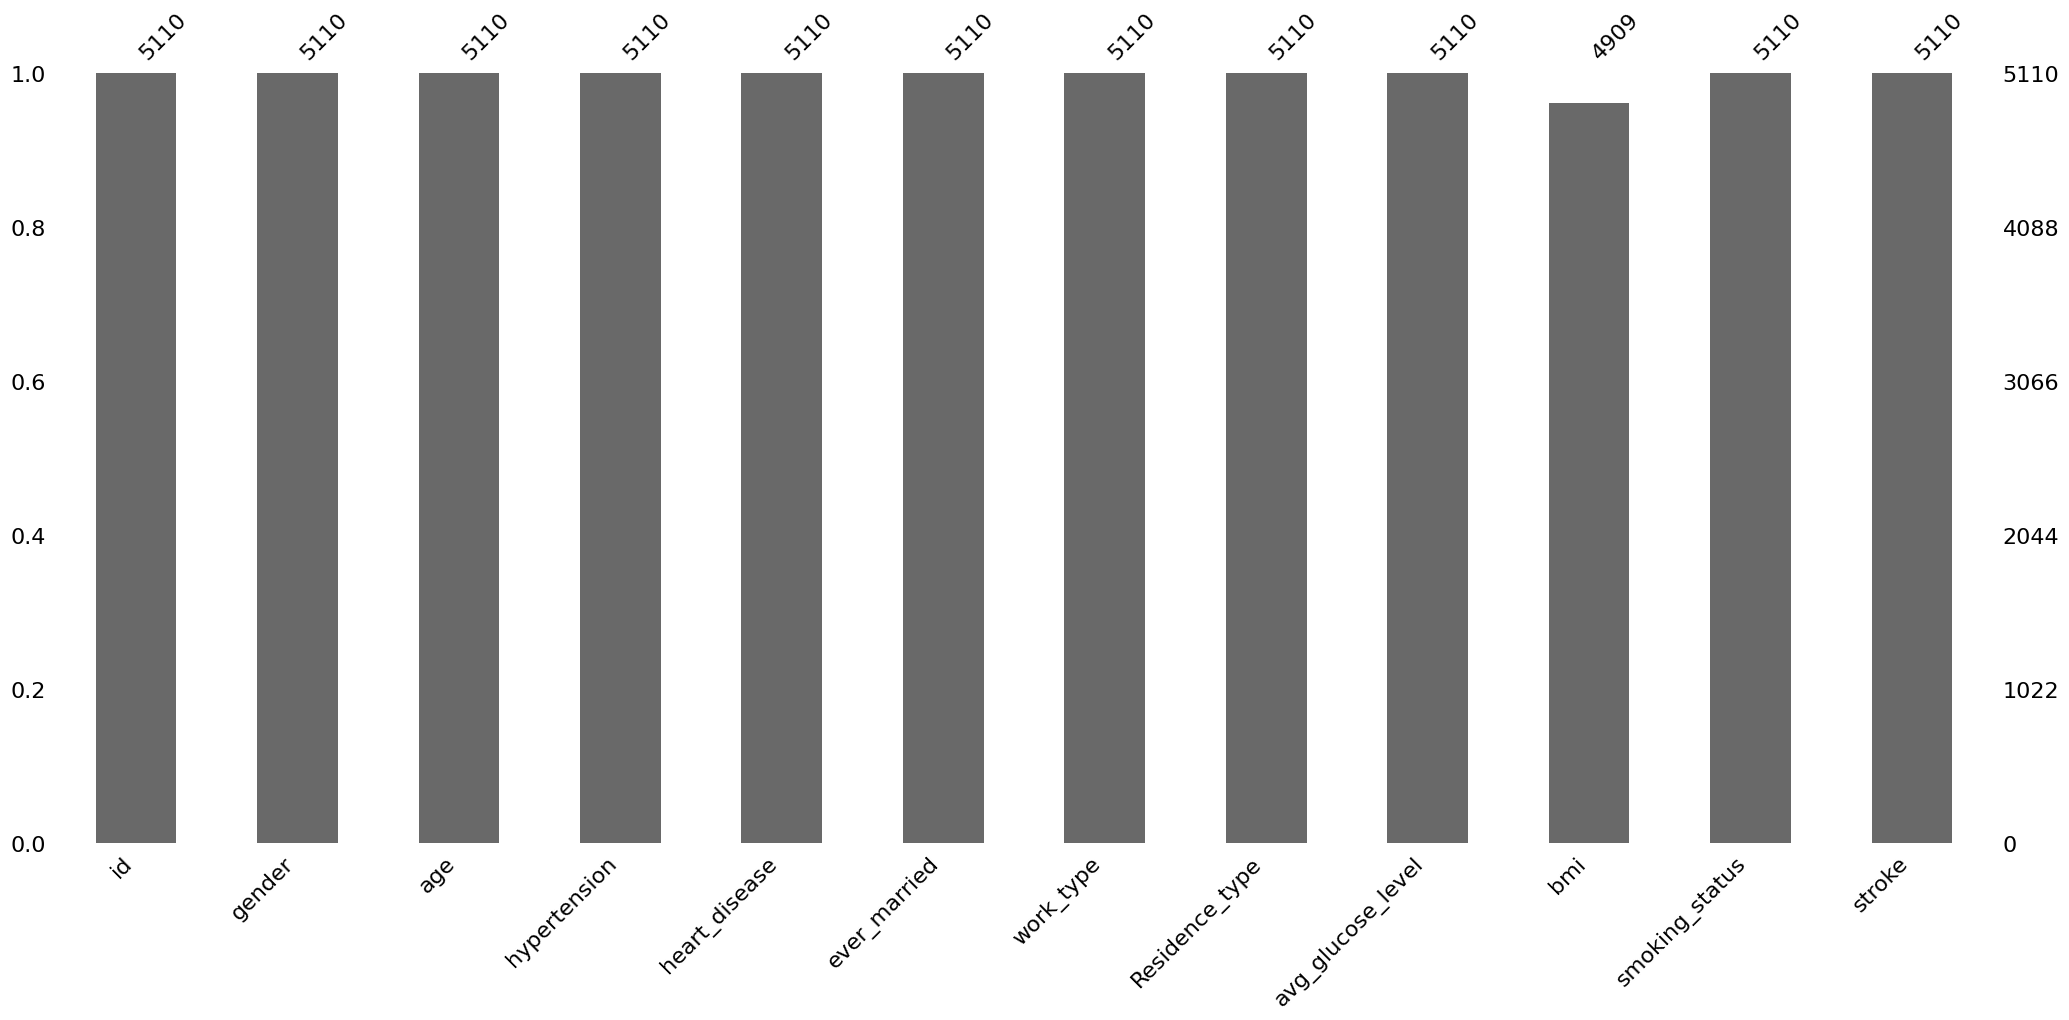

In [ ]:
print('DETECTION DES VALEURS MANQUANTES VIA UN HISTOGRAMME')
import missingno as msno
msno.bar(healthcare_df)

In [ ]:
print('DETECTION DES VALEURS MANQUANTES PAR SOMME DES NULS')
healthcare_df.isna().sum()

DETECTION DES VALEURS MANQUANTES PAR SOMME DES NULS


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

► On remarque que la colonne "bmi" a 201 valeurs manquantes.

In [ ]:
print('Vérification des valeurs uniques pour les colonnes catégorielles')
print()
def get_unique(df):
    for column in df.columns:
        if not column in ["id", "age", "avg_glucose_level", "bmi"]:
            print(column , ":",  df[column].unique())
get_unique(healthcare_df)


Vérification des valeurs uniques pour les colonnes catégorielles

gender : ['Male' 'Female' 'Other']
hypertension : [0 1]
heart_disease : [1 0]
ever_married : ['Yes' 'No']
work_type : ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : ['Urban' 'Rural']
smoking_status : ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : [1 0]


In [ ]:
print("Nombre d'observations :", healthcare_df.shape[0])
print("Nombre d'AVC :", healthcare_df.loc[healthcare_df.stroke==1].shape[0])

Nombre d'observations : 5110
Nombre d'AVC : 249


► On remarque qu'il y a un nombre faible de cas d'accident vasculaire cérébral (cas positifs) dans notre jeu de données, avec seulement *249* instances d'AVC sur un total de *5110* observations disponibles.
Notre ensemble de données est déséquilibré et cela affecterait les performances du modèle qu'on va utiliser.

## DISTRIBUTION DE LA VARIABLE STROKE SUR : Total- hypertension - heart_disease

Distribution AVC - GENRE - maladies cardiaques
* On observe que les maladies cardiaques sont quasiments même taux que les avc, que ce soit pour les femmes ou pour les hommes.
* On pourrait avec ce graphique, penser que les maladies cariovasculaires pourraient être liées aux AVC : POUR LES HOMMES MCV 2,2 %/ AVC 2,1% - POUR LES FEMMES MCV 3.2% POUR 2.8% AVC

Distribution AVC - GENRE - nombre d\'hypertensions
* En revanche pour l'ypertension, les hommes sont plus touchés alors qu'ils ont moins d'AVC que les femmes.
* Inverseement les femmes sont un peu moins touchées par l'hypertension que les homme alors qu'elles ont plus d'AVC.
* Les hommes ont significativement plus d'hypertension que les femmes alors qu'ils sont moins touchées par les AVC que les femmes.

Voici deux paragraphes pour étayer votre recherche sur la distribution des maladies cardiaques et des AVC, en mettant l'accent sur les différences entre les genres.

1. **Distribution des AVC et des maladies cardiaques par genre**:
    - Les maladies cardiaques et les accidents vasculaires cérébraux (AVC) sont deux problèmes de santé majeurs qui touchent des millions de personnes dans le monde. En examinant les taux de prévalence, on constate que les maladies cardiaques et les AVC ont des taux similaires, que ce soit chez les femmes ou chez les hommes. Cela signifie que les deux sexes sont exposés de manière équivalente à ces risques cardiovasculaires. Cependant, il est important de noter que les mécanismes sous-jacents diffèrent. Les maladies cardiaques, telles que les infarctus du myocarde, sont souvent causées par une oblitération d'un vaisseau sanguin alimentant le cœur, tandis que les AVC touchent le cerveau et peuvent être dus à une obstruction artérielle ou à une hémorragie cérébrale. Malgré ces différences, les deux conditions nécessitent une prise en charge urgente pour minimiser les dommages⁶.
    - Un graphique intéressant montre que les maladies cardiovasculaires (MCV) pourraient être liées aux AVC. Chez les hommes, le taux de MCV est de 2,2 %, tandis que le taux d'AVC est de 2,1 %. Chez les femmes, le taux de MCV est de 3,2 %, tandis que le taux d'AVC est de 2,8 %. Cette corrélation suggère que les facteurs de risque communs, tels que l'hypertension artérielle, pourraient jouer un rôle dans le développement à la fois des maladies cardiaques et des AVC. Il est donc essentiel de sensibiliser davantage à ces problèmes de santé et de promouvoir des mesures préventives pour réduire leur incidence⁶.

2. **Distribution des AVC et des hypertensions par genre**:
    - En ce qui concerne l'hypertension artérielle, les hommes sont plus touchés que les femmes, bien que leur taux d'AVC soit inférieur. Cette observation peut sembler contre-intuitive, mais elle met en évidence l'importance de considérer d'autres facteurs de risque. Les hommes présentent significativement plus d'hypertension que les femmes, ce qui pourrait contribuer à leur prédisposition aux maladies cardiaques. D'un autre côté, les femmes sont légèrement moins touchées par l'hypertension, mais elles ont un taux d'AVC plus élevé. Cette complexité souligne l'importance d'une approche globale de la santé cardiovasculaire, en tenant compte des différences de genre et des facteurs de risque spécifiques à chaque groupe⁶.

En somme, la compréhension des liens entre les maladies cardiaques, les AVC et l'hypertension est essentielle pour améliorer la prévention, le diagnostic précoce et la prise en charge de ces affections graves.

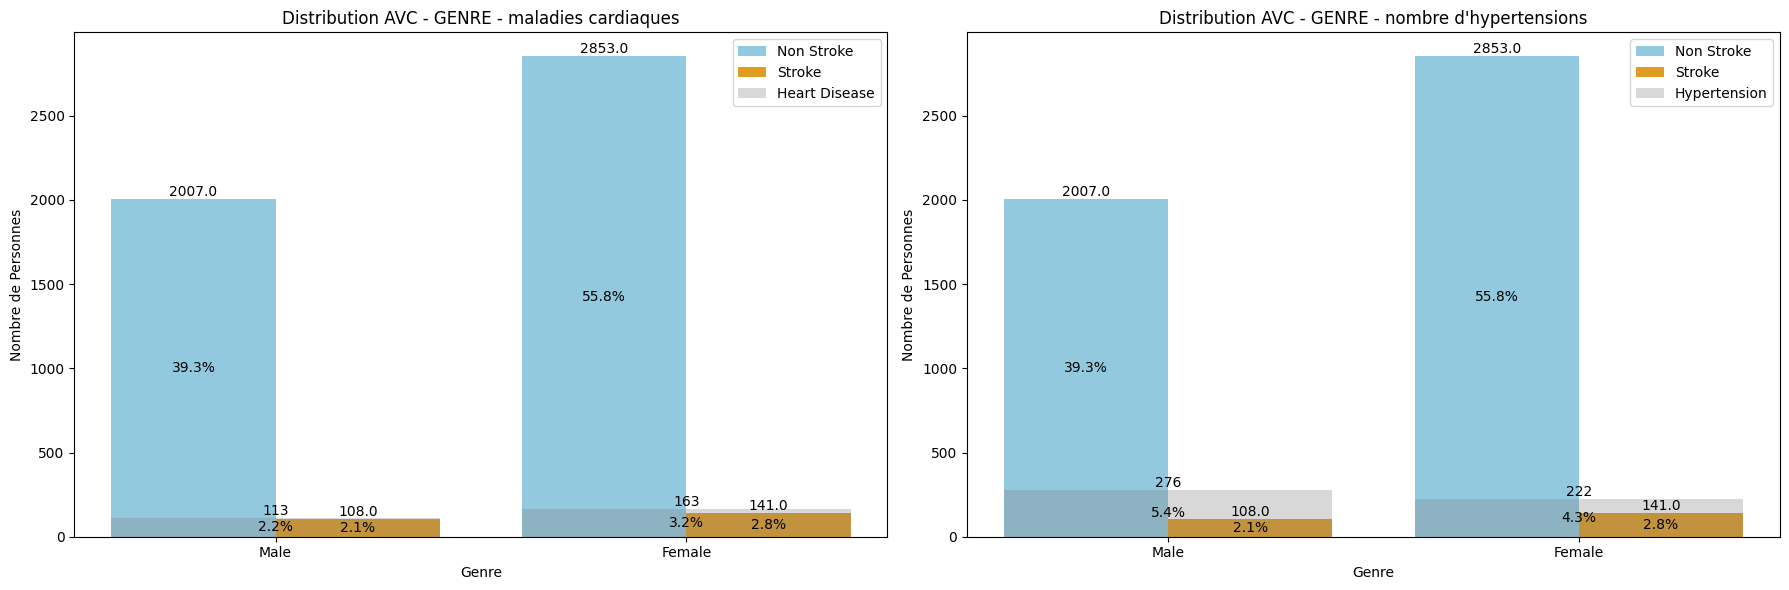

In [ ]:
healthcare_df = healthcare_df[healthcare_df['gender'] != 'Other']

# Créer une figure avec 1 ligne et 2 colonnes
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Graphique pour 'heart_disease'
sns.countplot(x='gender', hue='stroke', data=healthcare_df, palette=['skyblue', 'orange'], ax=axs[0])
axs[0].set_title('Distribution AVC - GENRE - maladies cardiaques')
axs[0].set_xlabel('Genre')
axs[0].set_ylabel('Nombre de Personnes')
axs[0].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

# nombre total de maladies cardiaques par genre
heart_disease_counts = healthcare_df.groupby(['gender', 'heart_disease']).size().unstack(fill_value=0).reset_index()
heart_disease_counts['total'] = heart_disease_counts[1]  # Utiliser 1 pour "Heart Disease" et 0 pour "No Heart Disease"
axs[0].bar(heart_disease_counts['gender'], heart_disease_counts['total'], color='gray', alpha=0.3, label='Heart Disease')

# Ajouter le nombre au-dessus de chaque barre et le pourcentage dans la barre
total = len(healthcare_df)
for p in axs[0].patches:
    height = p.get_height()
    # Ajouter le nombre au-dessus de la barre
    axs[0].annotate(f'{height}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')
    # Ajouter le pourcentage dans la barre
    axs[0].annotate(f'{height/total*100:.1f}%',
                       (p.get_x() + p.get_width() / 2., height/2),
                       ha='center', va='center')

axs[0].legend(labels=['Non Stroke', 'Stroke', 'Heart Disease'])

# Graphique pour 'hypertension'
sns.countplot(x='gender', hue='stroke', data=healthcare_df, palette=['skyblue', 'orange'], ax=axs[1])
axs[1].set_title('Distribution AVC - GENRE - nombre d\'hypertensions')
axs[1].set_xlabel('Genre')
axs[1].set_ylabel('Nombre de Personnes')
axs[1].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

# Nombre total d'hypertensions par genre
hypertension_counts = healthcare_df.groupby(['gender', 'hypertension']).size().unstack(fill_value=0).reset_index()
hypertension_counts['total'] = hypertension_counts[1]  # Utiliser 1 pour "Hypertension" et 0 pour "No Hypertension"
axs[1].bar(hypertension_counts['gender'], hypertension_counts['total'], color='gray', alpha=0.3, label='Hypertension')

# Ajouter le nombre au-dessus de chaque barre et le pourcentage dans la barre
total = len(healthcare_df)
for p in axs[1].patches:
    height = p.get_height()
    # Ajouter le nombre au-dessus de la barre
    axs[1].annotate(f'{height}',
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom')
    # Ajouter le pourcentage dans la barre
    axs[1].annotate(f'{height/total*100:.1f}%',
                       (p.get_x() + p.get_width() / 2., height/2),
                       ha='center', va='center')

axs[1].legend(labels=['Non Stroke', 'Stroke', 'Hypertension'])

plt.tight_layout()
plt.show()


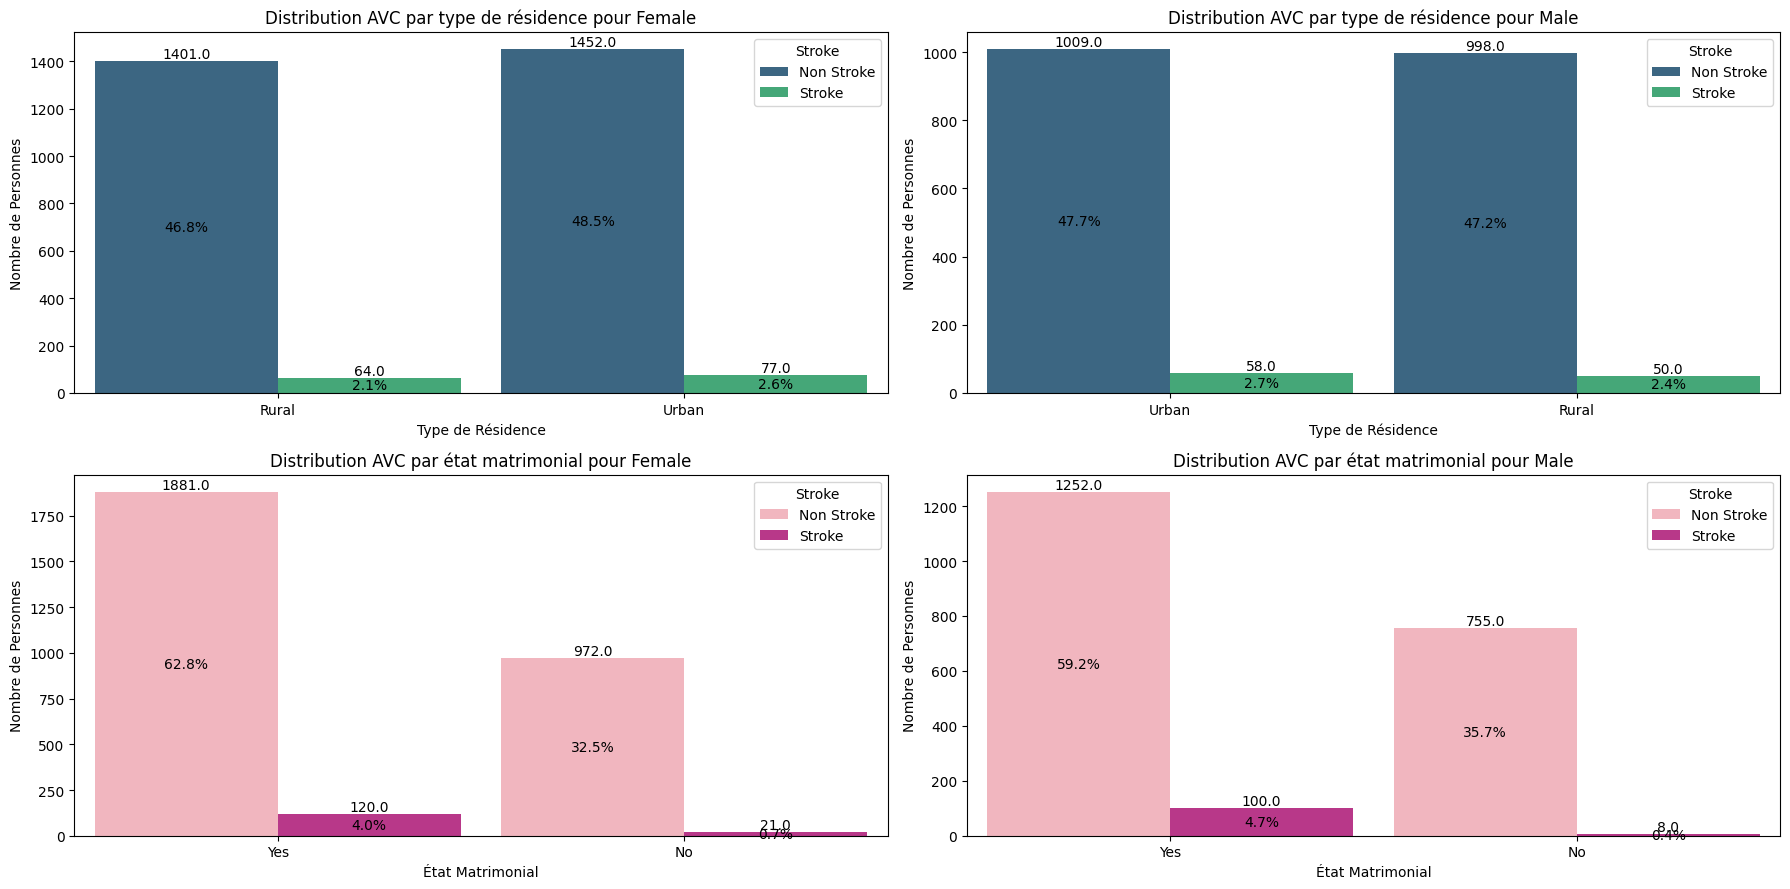

In [ ]:
genders = ['Female', 'Male']

fig, axs = plt.subplots(2, 2, figsize=(18, 9))

for i, gender in enumerate(genders):
    df_gender = healthcare_df[healthcare_df['gender'] == gender]

    # 'Residence_type'
    sns.countplot(x='Residence_type', hue='stroke', data=df_gender, palette='viridis', ax=axs[0, i], width=0.9)
    axs[0, i].set_title(f'Distribution AVC par type de résidence pour {gender}')
    axs[0, i].set_xlabel('Type de Résidence')
    axs[0, i].set_ylabel('Nombre de Personnes')
    axs[0, i].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

    total = len(df_gender)
    for p in axs[0, i].patches:
        height = p.get_height()
        axs[0, i].annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom')
        axs[0, i].annotate(f'{height/total*100:.1f}%',
                           (p.get_x() + p.get_width() / 2., height/2),
                           ha='center', va='center')
    # 'ever_married'
    sns.countplot(x='ever_married', hue='stroke', data=df_gender, palette='RdPu', ax=axs[1, i], width=0.9)
    axs[1, i].set_title(f'Distribution AVC par état matrimonial pour {gender}')
    axs[1, i].set_xlabel('État Matrimonial')
    axs[1, i].set_ylabel('Nombre de Personnes')
    axs[1, i].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

    total = len(df_gender)
    for p in axs[1, i].patches:
        height = p.get_height()
        axs[1, i].annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom')
        axs[1, i].annotate(f'{height/total*100:.1f}%',
                           (p.get_x() + p.get_width() / 2., height/2),
                           ha='center', va='center')
plt.tight_layout()
plt.show()

**Distribution AVC par type de résidence** :
* En comparant les deux types de résidence, nous constatons que le pourcentage d’AVC est légèrement plus élevé en milieu urbain pour les deux sexes.
* Les femmes semblent être plus touchées par les AVC que les hommes, quelle que soit la zone de résidence (rurale ou urbaine).

**Distribution AVC par état matrimonial** :
* Les femmes mariées semblent présenter un risque plus élevé d’AVC que les femmes non mariées. Cela pourrait être lié à des facteurs tels que le stress, la grossesse, la gestion des responsabilités familiales et les changements hormonaux.
* Chez les hommes, le risque d’AVC est plus élevé chez les mariés que chez les non mariés. Cela peut être influencé par des facteurs de mode de vie, tels que le stress professionnel, la sédentarité et l’alimentation.



**Corrélation entre l’état matrimonial et le type de résidence concernant les AVC :**

1. **Type de résidence** :
    - En comparant les deux types de résidence, nous constatons que le pourcentage d’AVC est légèrement plus élevé en **milieu urbain** pour les deux sexes.
    - Cela pourrait être dû à des facteurs tels que le **mode de vie urbain**, le **stress**, l’accès aux soins de santé et les habitudes alimentaires spécifiques aux zones urbaines.

2. **Genre** :
    - Les femmes semblent être plus touchées par les AVC que les hommes, quelle que soit la zone de résidence (rurale ou urbaine).
    - Cela pourrait être influencé par des différences hormonales, des facteurs de risque spécifiques aux femmes (comme la grossesse et la ménopause), ainsi que des disparités dans l’accès aux soins de santé.

3. **État matrimonial** :
    - Les femmes mariées présentent un risque plus élevé d’AVC que les femmes non mariées. Cela pourrait être lié à des facteurs tels que le **stress**, la **gestion des responsabilités familiales** et les **changements hormonaux** associés au mariage.
    - Chez les hommes, le risque d’AVC est également plus élevé chez les mariés que chez les non mariés. Cela peut être influencé par des facteurs de mode de vie, tels que le **stress professionnel**, la **sédentarité** et l’**alimentation**.

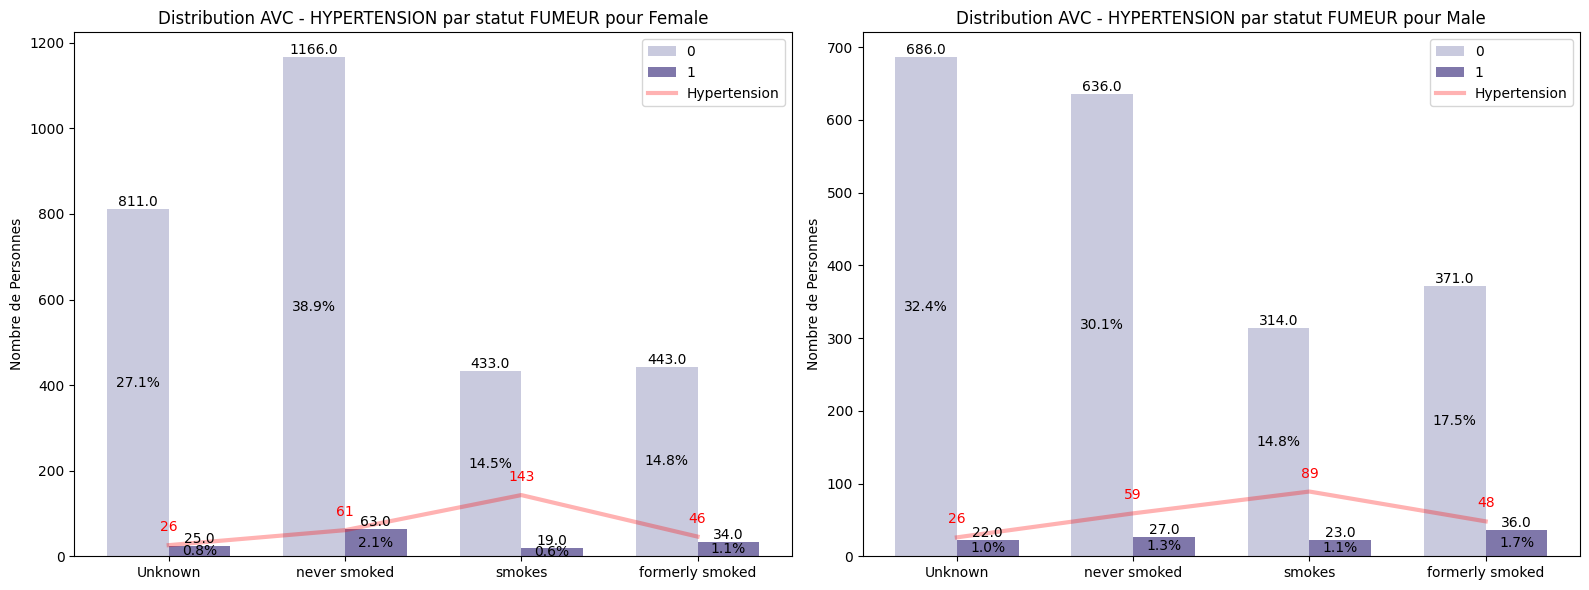

In [ ]:
genders = ['Female', 'Male']

smoking_status_order = ['Unknown', 'never smoked', 'smokes', 'formerly smoked']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Boucle sur les genres pour créer des graphiques pour chaque genre
for i, gender in enumerate(genders):
    # Filtrer les données pour le genre spécifique
    df_gender = healthcare_df[healthcare_df['gender'] == gender]

    # Graphique pour 'smoking_status'
    countplot = sns.countplot(x='smoking_status', hue='stroke', data=df_gender, palette='Purples', ax=axs[i], width=0.7, order=smoking_status_order)
    axs[i].set_title(f'Distribution AVC - HYPERTENSION par statut FUMEUR pour {gender}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Nombre de Personnes')
    axs[i].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

    # Nombre total d'hypertensions par genre
    hypertension_counts = df_gender.groupby(['smoking_status', 'hypertension']).size().unstack(fill_value=0).reset_index()
    hypertension_counts['total'] = hypertension_counts[1]  # Utiliser 1 pour "Hypertension" et 0 pour "No Hypertension"

    lineplot = axs[i].plot(hypertension_counts['smoking_status'], hypertension_counts['total'], color='#FF0000', alpha=0.3,linewidth=3)

    # Ajouter des annotations pour les points de l'hypertension
    for j, total in enumerate(hypertension_counts['total']):
        axs[i].annotate(f'{total}',
                        (j, total),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        color='red')
    # Annotations
    total = len(df_gender)
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom')
        axs[i].annotate(f'{height/total*100:.1f}%',
                           (p.get_x() + p.get_width() / 2., height/2),
                           ha='center', va='center')

    # légende pour l'hypertension
    line = Line2D([0], [0], color='#FF0000', alpha=0.3, linewidth=3, label='Hypertension')
    handles, labels = axs[i].get_legend_handles_labels()
    handles.append(line)
    labels.append('Hypertension')
    axs[i].legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()

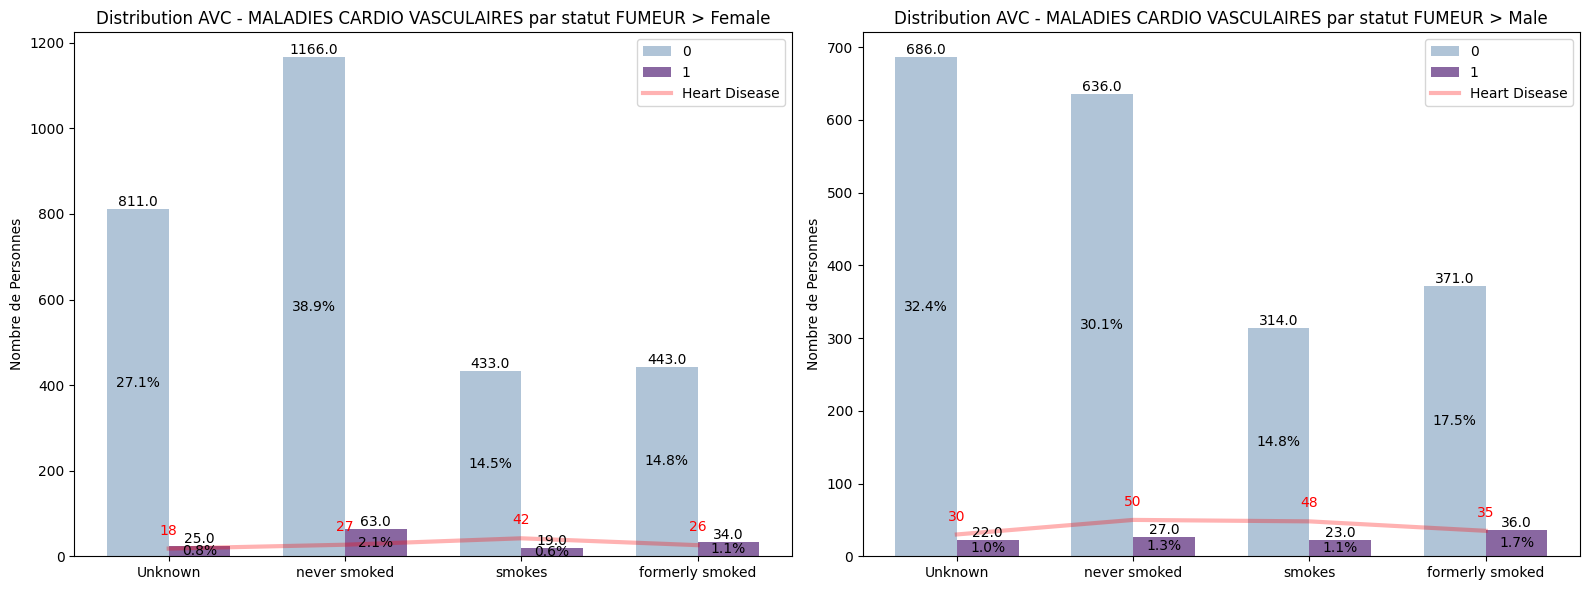

In [ ]:
genders = ['Female', 'Male']

# Ordre des catégories 'smoking_status'
smoking_status_order = ['Unknown', 'never smoked', 'smokes', 'formerly smoked']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Boucle sur les genres pour créer des graphiques pour chaque genre
for i, gender in enumerate(genders):
    # Filtrer les données pour le genre spécifique
    df_gender = healthcare_df[healthcare_df['gender'] == gender]

    # Graphique pour 'smoking_status'
    countplot = sns.countplot(x='smoking_status', hue='stroke', data=df_gender, palette='BuPu', ax=axs[i], width=0.7, order=smoking_status_order)
    axs[i].set_title(f'Distribution AVC - MALADIES CARDIO VASCULAIRES par statut FUMEUR > {gender}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Nombre de Personnes')
    axs[i].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

    # Nombre total de maladies cardiaques par genre
    heart_disease_counts = df_gender.groupby(['smoking_status', 'heart_disease']).size().unstack(fill_value=0).reset_index()
    heart_disease_counts['total'] = heart_disease_counts[1]  # Utiliser 1 pour "Heart Disease" et 0 pour "No Heart Disease"

    lineplot = axs[i].plot(heart_disease_counts['smoking_status'], heart_disease_counts['total'], color='#FF0000', alpha=0.3, linewidth=3)

    # Ajouter des annotations pour les points de maladies cardiaques en rouge
    for j, total in enumerate(heart_disease_counts['total']):
        axs[i].annotate(f'{total}',
                        (j, total),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        color='red')
    # Annotations
    total = len(df_gender)
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom')
        axs[i].annotate(f'{height/total*100:.1f}%',
                           (p.get_x() + p.get_width() / 2., height/2),
                           ha='center', va='center')

    # légende pour les maladies cardiaques
    line = Line2D([0], [0], color='#FF0000', alpha=0.3, linewidth=3, label='Heart Disease')
    handles, labels = axs[i].get_legend_handles_labels()
    handles.append(line)
    labels.append('Heart Disease')
    axs[i].legend(handles=handles, labels=labels)

plt.tight_layout()
plt.show()

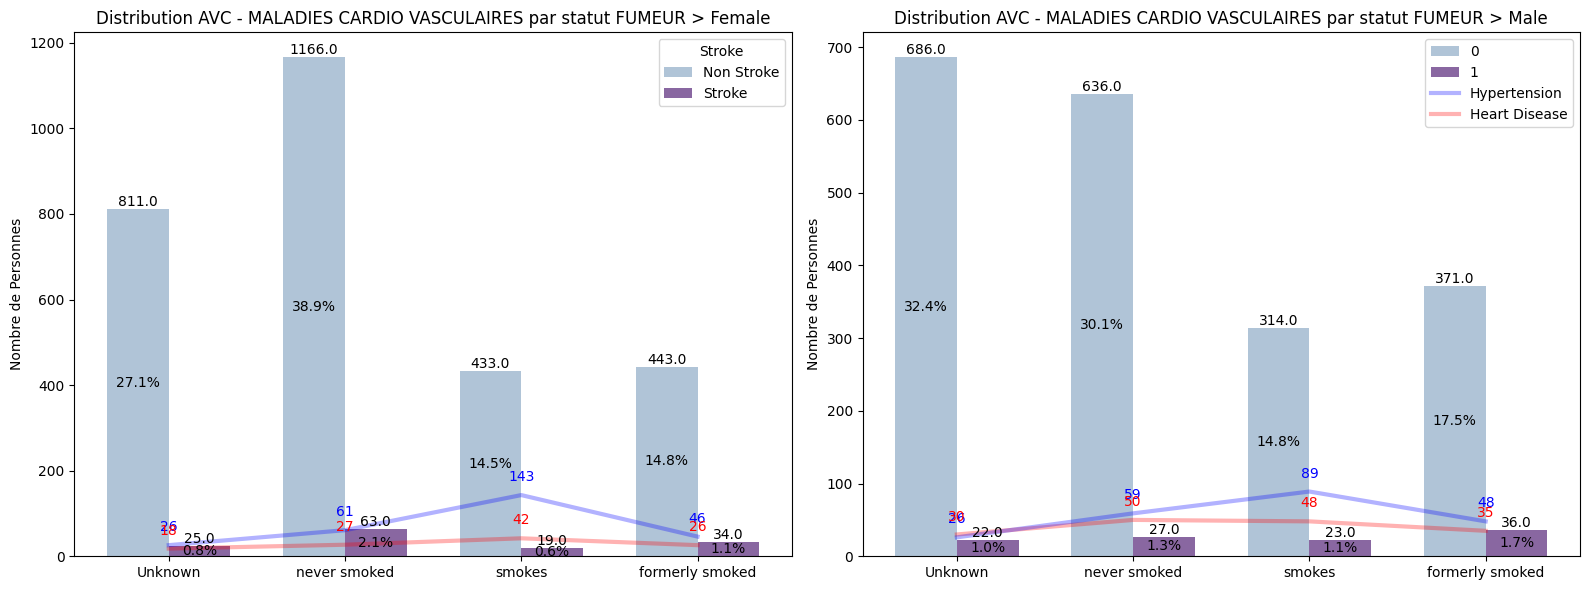

In [ ]:
genders = ['Female', 'Male']

# Ordre des catégories 'smoking_status'
smoking_status_order = ['Unknown', 'never smoked', 'smokes', 'formerly smoked']

fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Boucle sur les genres pour créer des graphiques pour chaque genre
for i, gender in enumerate(genders):
    # Filtrer les données pour le genre spécifique
    df_gender = healthcare_df[healthcare_df['gender'] == gender]

    # Graphique pour 'smoking_status'
    countplot = sns.countplot(x='smoking_status', hue='stroke', data=df_gender, palette='BuPu', ax=axs[i], width=0.7, order=smoking_status_order)
    axs[i].set_title(f'Distribution AVC - MALADIES CARDIO VASCULAIRES par statut FUMEUR > {gender}')
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Nombre de Personnes')
    axs[i].legend(title='Stroke', labels=['Non Stroke', 'Stroke'])

    # Nombre total de maladies cardiaques par genre
    heart_disease_counts = df_gender.groupby(['smoking_status', 'heart_disease']).size().unstack(fill_value=0).reset_index()
    heart_disease_counts['total'] = heart_disease_counts[1]  # Utiliser 1 pour "Heart Disease" et 0 pour "No Heart Disease"

    lineplot = axs[i].plot(heart_disease_counts['smoking_status'], heart_disease_counts['total'], color='#FF0000', alpha=0.3, linewidth=3)

    # Nombre total d'hypertensions par genre
    hypertension_counts = df_gender.groupby(['smoking_status', 'hypertension']).size().unstack(fill_value=0).reset_index()
    hypertension_counts['total'] = hypertension_counts[1]  # Utiliser 1 pour "Hypertension" et 0 pour "No Hypertension"

    lineplot = axs[i].plot(hypertension_counts['smoking_status'], hypertension_counts['total'], color='blue', alpha=0.3,linewidth=3)

    # Ajouter des annotations pour les points de l'hypertension
    for j, total in enumerate(hypertension_counts['total']):
        axs[i].annotate(f'{total}',
                        (j, total),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        color='blue')




    # Ajouter des annotations pour les points de maladies cardiaques en rouge
    for j, total in enumerate(heart_disease_counts['total']):
        axs[i].annotate(f'{total}',
                        (j, total),
                        textcoords="offset points",
                        xytext=(0,10),
                        ha='center',
                        color='red')
    # Annotations
    total = len(df_gender)
    for p in axs[i].patches:
        height = p.get_height()
        axs[i].annotate(f'{height}',
                           (p.get_x() + p.get_width() / 2., height),
                           ha='center', va='bottom')
        axs[i].annotate(f'{height/total*100:.1f}%',
                           (p.get_x() + p.get_width() / 2., height/2),
                           ha='center', va='center')

# Légende pour l'hypertension
line_hypertension = Line2D([0], [0], color='blue', alpha=0.3, linewidth=3, label='Hypertension')
handles, labels = axs[i].get_legend_handles_labels()
handles.append(line_hypertension)
labels.append('Hypertension')

# Légende pour les maladies cardiaques
line_heart_disease = Line2D([0], [0], color='#FF0000', alpha=0.3, linewidth=3, label='Heart Disease')
handles.append(line_heart_disease)
labels.append('Heart Disease')

axs[i].legend(handles=handles, labels=labels)
plt.tight_layout()
plt.show()


## REPARTITION GENERALE ET PAR SEX - DE CHAQUE COLONNES

Il est visible que chaque répartition de l’ensemble des graphiques ne présente pas d’écart significatif entre la population totale et les différences de sexe. L’écart le plus grand est d’environ 4%. Quelle que soit la population ou les variables, les problématiques ou les statuts des patients, on ne constate pas d’écarts significatifs qui justifieraient une approche différente. Les femmes sont presque toujours les plus touchées, quelque soit la condition.

Résumé : Les graphiques montrent une répartition homogène entre les sexes pour toutes les variables étudiées.

Les femmes sont légèrement plus touchées, mais l’écart n’est pas significatif (4% au maximum).


Conclusion : On ne relève donc pas de patologie ou d environnement favorisant l AVC

ETUDE PAR VISUALISATION
REPARTITION GENERALE ET PAR SEX - DE CHAQUE COLONNES :

Les graphiques montrent une répartition homogène entre les sexes pour toutes les variables étudiées.
Les femmes sont légèrement plus touchées, mais l’écart n’est pas significatif (3,5 maximum).

CONCLUSION
 On ne relève donc pas de patologie ou d environnement favorisant l AVC


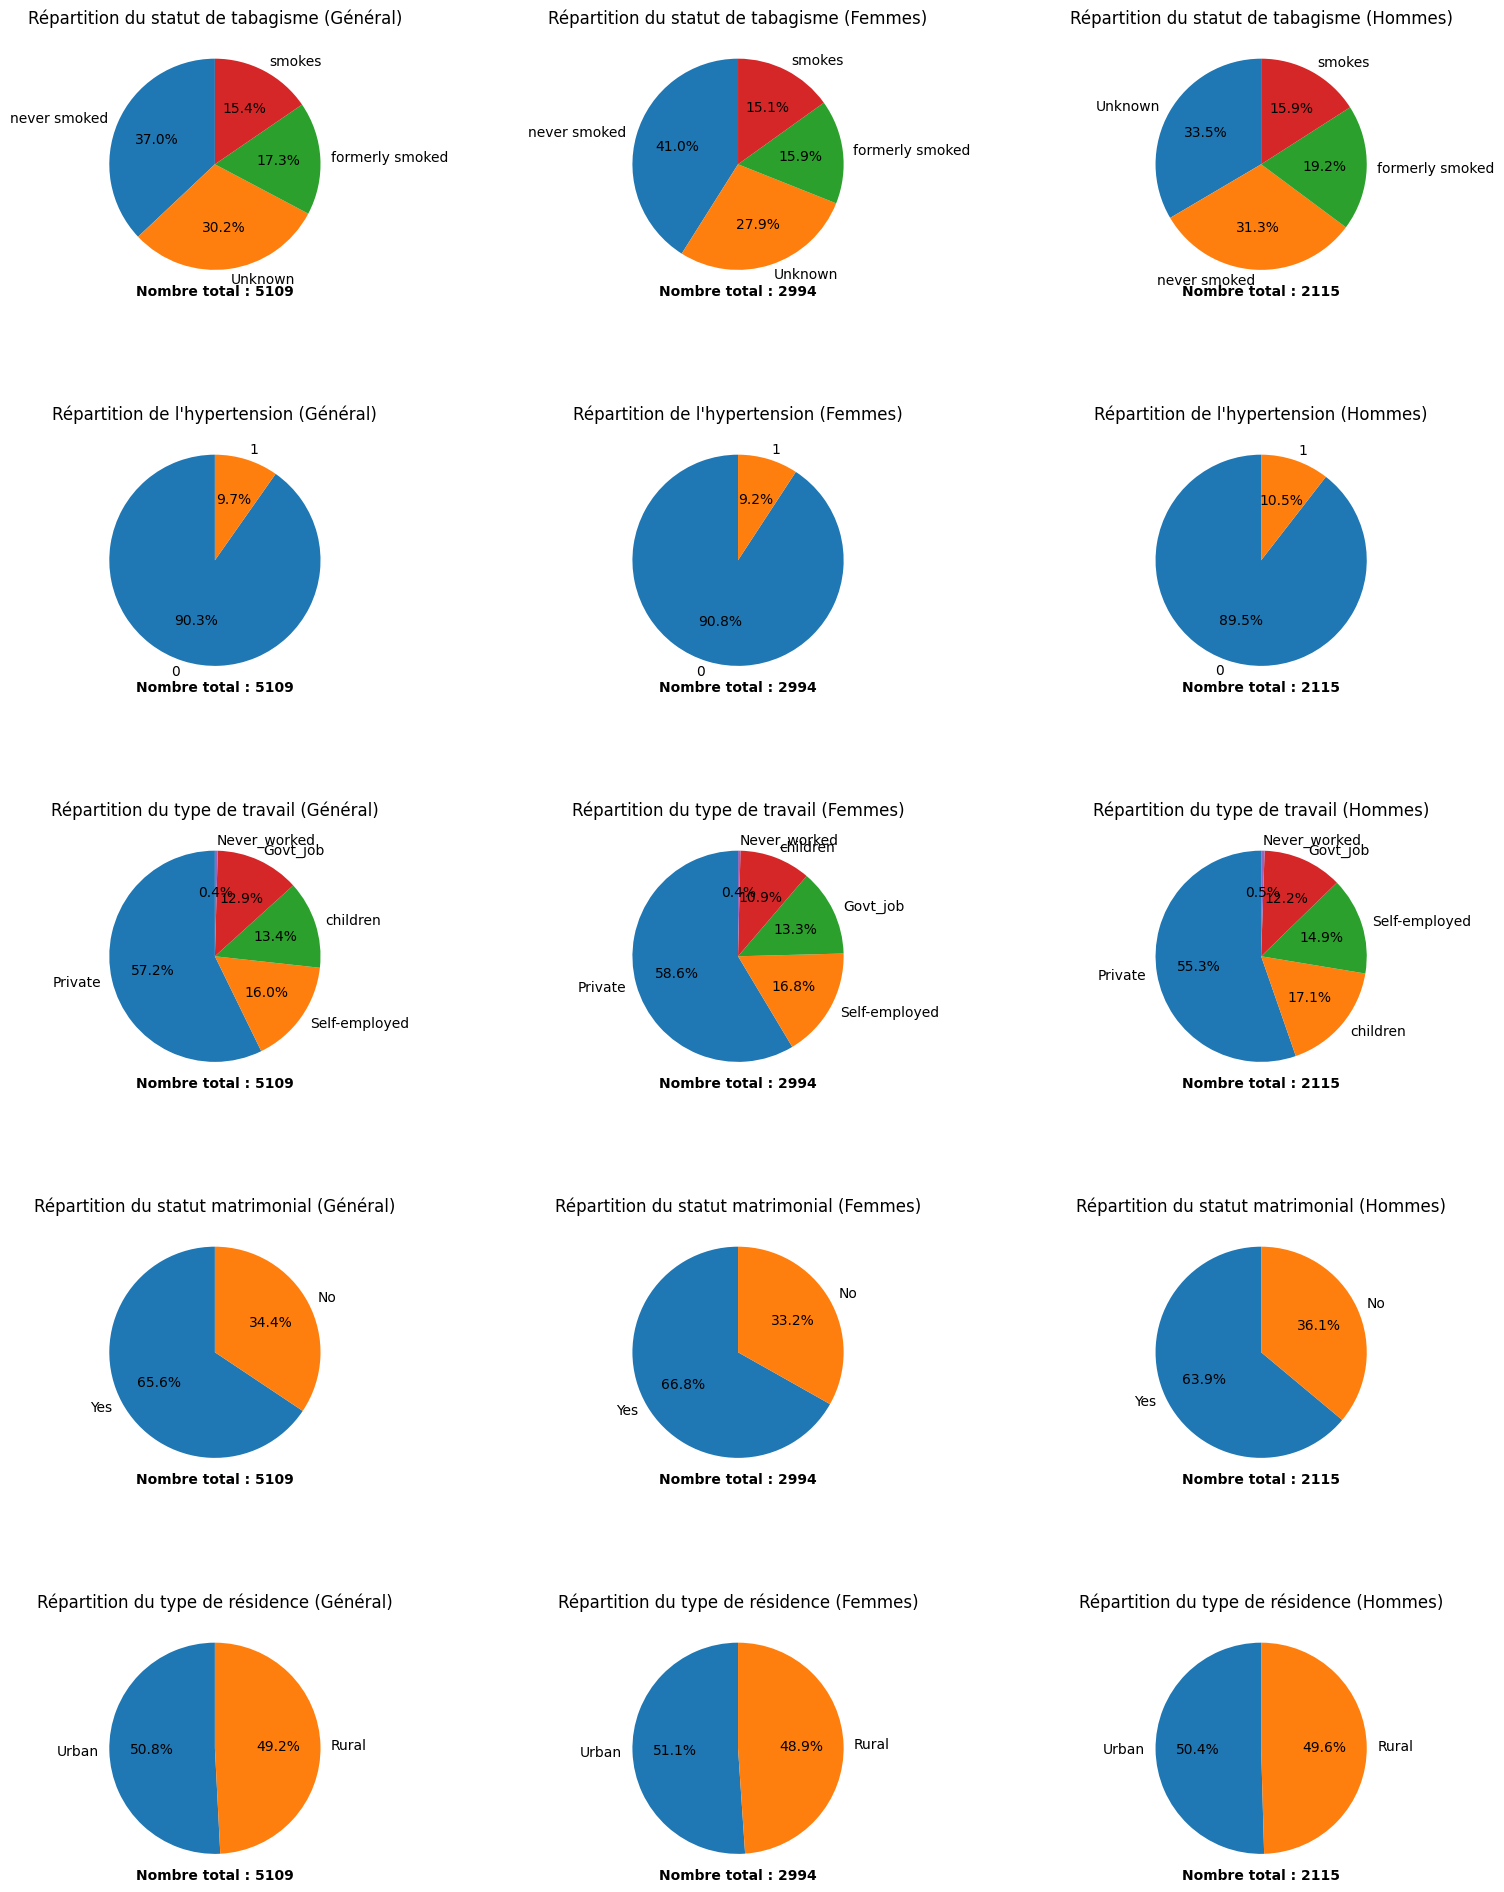

In [ ]:
print('ETUDE PAR VISUALISATION')
print('REPARTITION GENERALE ET PAR SEX - DE CHAQUE COLONNES :')
print()
print('Les graphiques montrent une répartition homogène entre les sexes pour toutes les variables étudiées.')
print('Les femmes sont légèrement plus touchées, mais l’écart n’est pas significatif (3,5 maximum).')
print()
print('CONCLUSION')
print(' On ne relève donc pas de patologie ou d environnement favorisant l AVC')
female_data = healthcare_df[healthcare_df['gender'] == 'Female']
male_data = healthcare_df[healthcare_df['gender'] == 'Male']


def create_pie_chart(ax, data, title): # Fonction graphique camembert avec pourcentage et nombre
    ax.set_title(title)

    # Calculer le pourcentage et nombre total
    total_count = data.shape[0]
    percentages = data.value_counts(normalize=True) * 100

    # Créer le graphique en camembert
    ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90)
    ax.text(0, -1.2, f"Nombre total : {total_count}", ha='center', va='center', fontweight='bold')

# Créer une grille de sous-graphiques (5 lignes, 3 colonnes)
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(18, 24))

# 'smoking_status'
create_pie_chart(axes[0, 0], healthcare_df['smoking_status'], 'Répartition du statut de tabagisme (Général)')
create_pie_chart(axes[0, 1], female_data['smoking_status'], 'Répartition du statut de tabagisme (Femmes)')
create_pie_chart(axes[0, 2], male_data['smoking_status'], 'Répartition du statut de tabagisme (Hommes)')

# 'hypertension'
create_pie_chart(axes[1, 0], healthcare_df['hypertension'], 'Répartition de l\'hypertension (Général)')
create_pie_chart(axes[1, 1], female_data['hypertension'], 'Répartition de l\'hypertension (Femmes)')
create_pie_chart(axes[1, 2], male_data['hypertension'], 'Répartition de l\'hypertension (Hommes)')

# 'work_type'
create_pie_chart(axes[2, 0], healthcare_df['work_type'], 'Répartition du type de travail (Général)')
create_pie_chart(axes[2, 1], female_data['work_type'], 'Répartition du type de travail (Femmes)')
create_pie_chart(axes[2, 2], male_data['work_type'], 'Répartition du type de travail (Hommes)')

# 'ever_married'
create_pie_chart(axes[3, 0], healthcare_df['ever_married'], 'Répartition du statut matrimonial (Général)')
create_pie_chart(axes[3, 1], female_data['ever_married'], 'Répartition du statut matrimonial (Femmes)')
create_pie_chart(axes[3, 2], male_data['ever_married'], 'Répartition du statut matrimonial (Hommes)')

# 'Residence_type'
create_pie_chart(axes[4, 0], healthcare_df['Residence_type'], 'Répartition du type de résidence (Général)')
create_pie_chart(axes[4, 1], female_data['Residence_type'], 'Répartition du type de résidence (Femmes)')
create_pie_chart(axes[4, 2], male_data['Residence_type'], 'Répartition du type de résidence (Hommes)')

# Masquer les graphiques inutilisés
for i in range(4):
    for j in range(3):
        if (i == 3 and j > 2) or (i < 3 and j > 2):
            axes[i, j].axis('off')

# Espacement entre les graphiques
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()


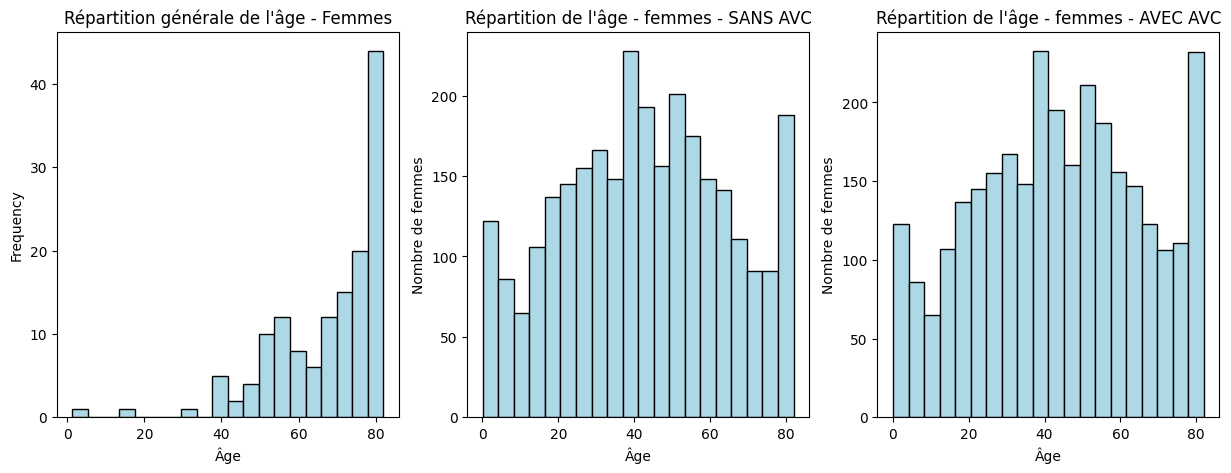

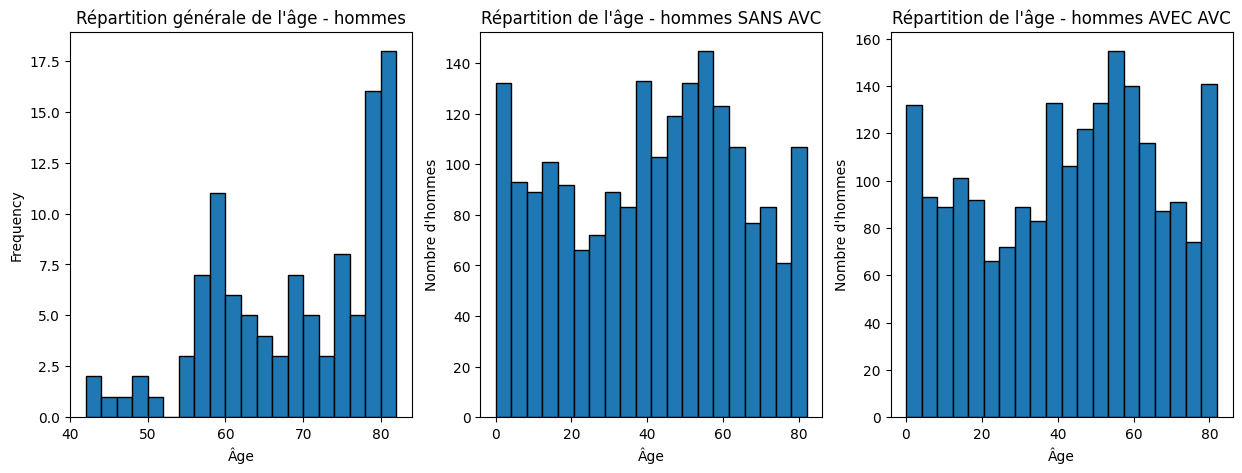

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

healthcare_df[healthcare_df['gender'] == 'Female']['age'].plot.hist(ax=axes[2], bins=20, edgecolor='black', color='lightblue')
axes[0].set_title('Répartition générale de l\'âge - Femmes')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de femmes')

healthcare_df[(healthcare_df['stroke'] == 0) & (healthcare_df['gender'] == 'Female')]['age'].plot.hist(ax=axes[1], bins=20, edgecolor='black', color='lightblue')
axes[1].set_title('Répartition de l\'âge - femmes - SANS AVC')
axes[1].set_xlabel('Âge')
axes[1].set_ylabel('Nombre de femmes')

healthcare_df[(healthcare_df['stroke'] == 1) & (healthcare_df['gender'] == 'Female')]['age'].plot.hist(ax=axes[0], bins=20, edgecolor='black', color='lightblue')
axes[2].set_title('Répartition de l\'âge - femmes - AVEC AVC')
axes[2].set_xlabel('Âge')
axes[2].set_ylabel('Nombre de femmes')

plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Répartition de l'âge pour les hommes n'ayant pas eu d'AVC (no stroke)
healthcare_df[(healthcare_df['stroke'] == 0) & (healthcare_df['gender'] == 'Male')]['age'].plot.hist(ax=axes[1], bins=20, edgecolor='black')
axes[1].set_title('Répartition de l\'âge - hommes SANS AVC')
axes[1].set_xlabel('Âge')
axes[1].set_ylabel('Nombre d\'hommes')

# Répartition de l'âge pour l'ensemble des hommes
healthcare_df[healthcare_df['gender'] == 'Male']['age'].plot.hist(ax=axes[2], bins=20, edgecolor='black')
axes[0].set_title('Répartition générale de l\'âge - hommes')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre d\'hommes')

# Répartition de l'âge pour les hommes ayant eu un AVC (stroke)
healthcare_df[(healthcare_df['stroke'] == 1) & (healthcare_df['gender'] == 'Male')]['age'].plot.hist(ax=axes[0], bins=20, edgecolor='black')
axes[2].set_title('Répartition de l\'âge - hommes AVEC AVC')
axes[2].set_xlabel('Âge')
axes[2].set_ylabel('Nombre d\'hommes')

plt.show()

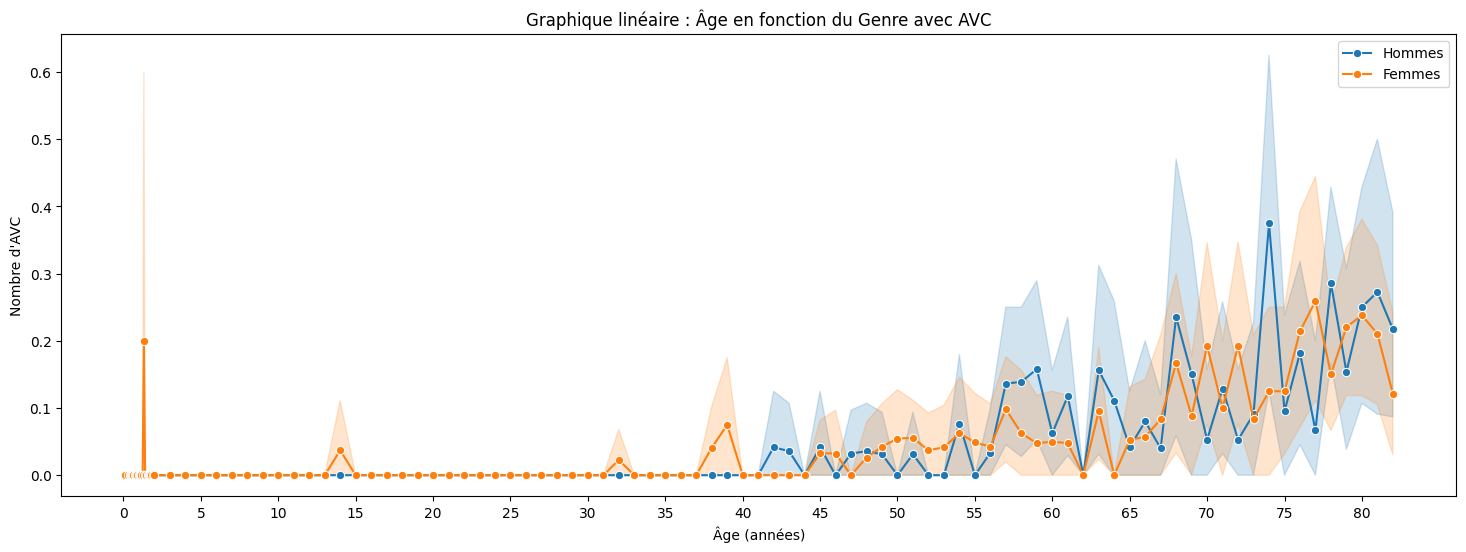

C:\Users\change\AppData\Local\Temp\ipykernel_8604\1569727889.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='hypertension', data=healthcare_df[healthcare_df['gender'] == 'Male'], label='Hommes', marker='o', palette='Blues')
C:\Users\change\AppData\Local\Temp\ipykernel_8604\1569727889.py:18: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='hypertension', data=healthcare_df[healthcare_df['gender'] == 'Female'], label='Femmes', marker='o', palette='Reds')


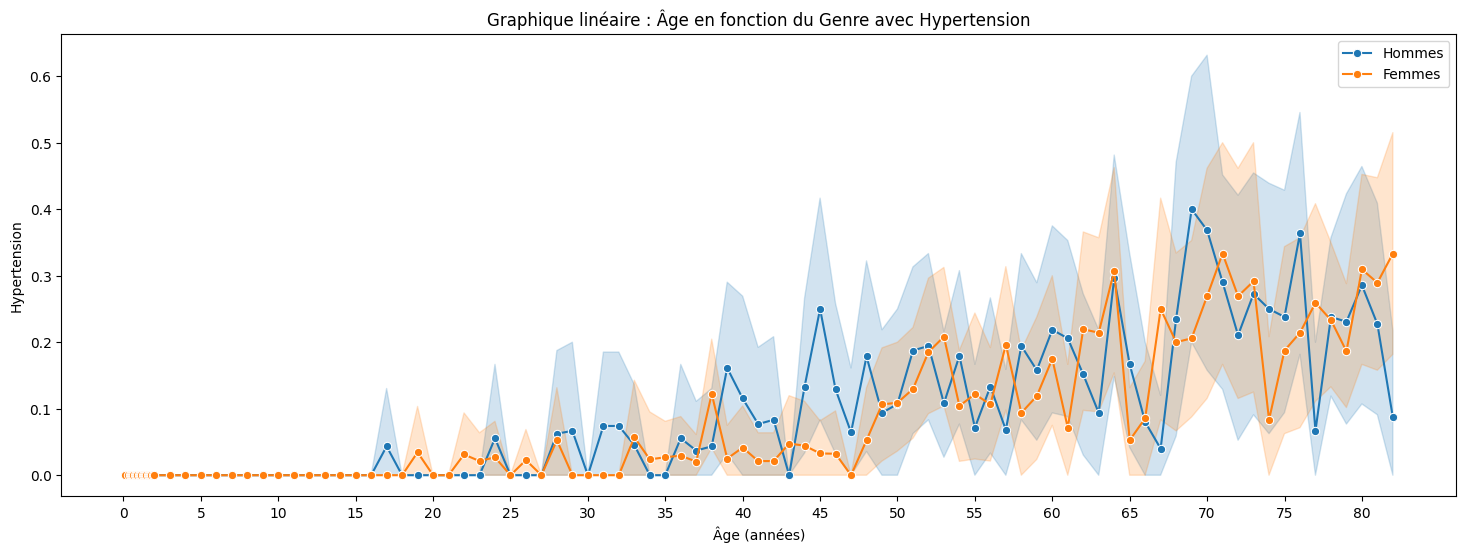

C:\Users\change\AppData\Local\Temp\ipykernel_8604\1569727889.py:28: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='heart_disease', data=healthcare_df[healthcare_df['gender'] == 'Male'], label='Hommes', marker='o', palette='Blues')
C:\Users\change\AppData\Local\Temp\ipykernel_8604\1569727889.py:29: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x='age', y='heart_disease', data=healthcare_df[healthcare_df['gender'] == 'Female'], label='Femmes', marker='o', palette='Reds')


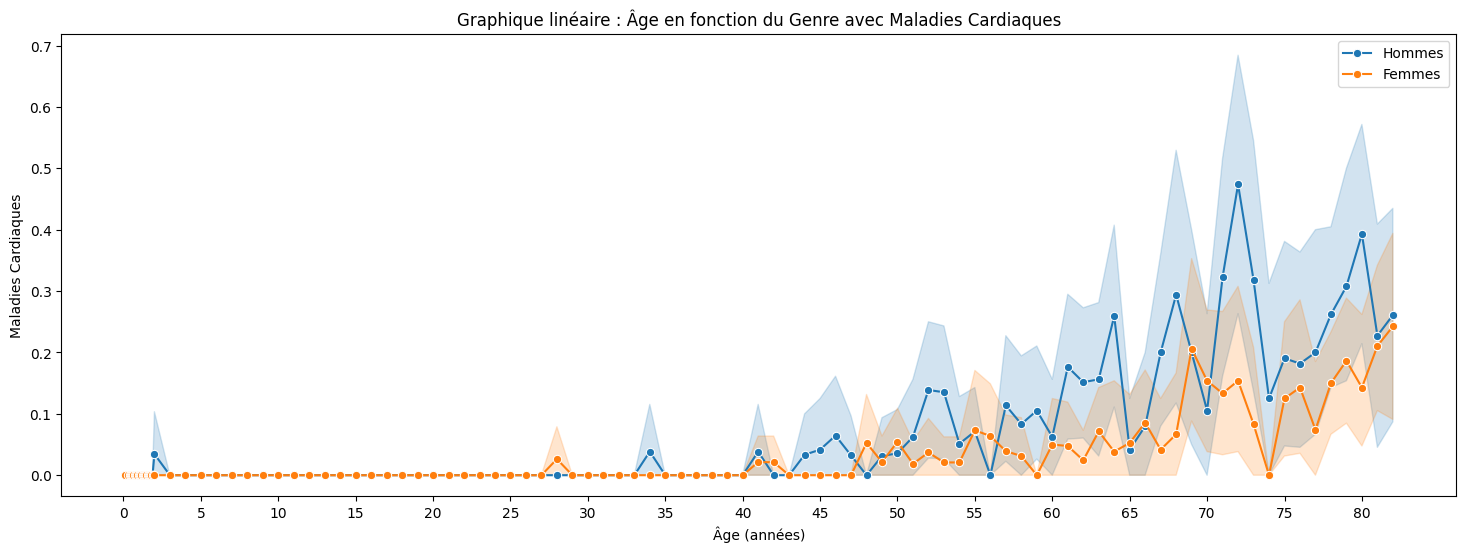

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graphique pour les AVC
plt.figure(figsize=(18, 6))
sns.lineplot(x='age', y='stroke', data=healthcare_df[healthcare_df['gender'] == 'Male'], label='Hommes', marker='o')
sns.lineplot(x='age', y='stroke', data=healthcare_df[healthcare_df['gender'] == 'Female'], label='Femmes', marker='o')
plt.title('Graphique linéaire : Âge en fonction du Genre avec AVC')
plt.xlabel('Âge (années)')  # Mise à jour de l'étiquette de l'axe des x
plt.ylabel('Nombre d\'AVC')
plt.xticks(np.arange(0, 81, 5))  # Afficher les âges par tranche de 5 ans (0, 5, 10, 15, etc.)
plt.legend()
plt.show()

# Graphique pour l'hypertension
plt.figure(figsize=(18, 6))
sns.lineplot(x='age', y='hypertension', data=healthcare_df[healthcare_df['gender'] == 'Male'], label='Hommes', marker='o', palette='Blues')
sns.lineplot(x='age', y='hypertension', data=healthcare_df[healthcare_df['gender'] == 'Female'], label='Femmes', marker='o', palette='Reds')
plt.title('Graphique linéaire : Âge en fonction du Genre avec Hypertension')
plt.xlabel('Âge (années)')  # Mise à jour de l'étiquette de l'axe des x
plt.ylabel('Hypertension')
plt.xticks(np.arange(0, 81, 5))  # Afficher les âges par tranche de 5 ans (0, 5, 10, 15, etc.)
plt.legend()
plt.show()

# Graphique pour les maladies cardiaques
plt.figure(figsize=(18, 6))
sns.lineplot(x='age', y='heart_disease', data=healthcare_df[healthcare_df['gender'] == 'Male'], label='Hommes', marker='o', palette='Blues')
sns.lineplot(x='age', y='heart_disease', data=healthcare_df[healthcare_df['gender'] == 'Female'], label='Femmes', marker='o', palette='Reds')
plt.title('Graphique linéaire : Âge en fonction du Genre avec Maladies Cardiaques')
plt.xlabel('Âge (années)')  # Mise à jour de l'étiquette de l'axe des x
plt.ylabel('Maladies Cardiaques')
plt.xticks(np.arange(0, 81, 5))  # Afficher les âges par tranche de 5 ans (0, 5, 10, 15, etc.)
plt.legend()
plt.show()


# Régressions linéaires stroke hypertension
Régression linéaire pour chaque genre et chaque condition de santé (AVC, hypertension, maladies cardiaques). Les résultats imprimés comprennent les coefficients de régression, les statistiques de test, et d’autres informations utiles pour l’analyse

**D’après les résultats de la régression linéaire, voici une synthèse :**

Variable dépendante (Dep. Variable) : La variable que nous essayons de prédire ou d’expliquer est ‘stroke’ (AVC).

R-carré (R-squared) : Ce modèle explique environ 6.6% de la variance dans les AVC. C’est une mesure de la qualité de l’ajustement du modèle.

F-statistique (F-statistic) et Prob (F-statistic) : La F-statistique est de 149.5 et la probabilité associée est très petite (2.89e-33). Cela indique que le modèle est statistiquement significatif - c’est-à-dire qu’il y a une forte certitude que la relation entre l’âge et les AVC n’est pas due au hasard.

coef : Pour chaque augmentation d’un an de l’âge, le nombre d’AVC augmente en moyenne de 0.0024, en supposant que toutes les autres variables restent constantes.

P>|t| : La p-valeur associée à l’âge est très petite, ce qui indique que l’âge est un prédicteur significatif des AVC dans ce modèle.

Omnibus/Prob(Omnibus) : Ces tests sont utilisés pour évaluer l’adéquation du modèle. Dans ce cas, la probabilité Omnibus est de 0, ce qui indique que les résidus ne sont pas normalement distribués.

Skew : La valeur de Skewness est de 3.648, ce qui indique une asymétrie positive. Cela signifie que la distribution des résidus est légèrement décalée vers la droite.

Kurtosis : La valeur de Kurtosis est de 15.484, ce qui indique une distribution “plus pointue” que la distribution normale, avec des queues plus lourdes.

In [ ]:
# AVC
X = healthcare_df['age'][healthcare_df['gender'] == 'Male']
y = healthcare_df['stroke'][healthcare_df['gender'] == 'Male']
X = sm.add_constant(X)  # Ajout d'une constante
model = sm.OLS(y, X).fit()
print(model.summary())

X = healthcare_df['age'][healthcare_df['gender'] == 'Female']
y = healthcare_df['stroke'][healthcare_df['gender'] == 'Female']
X = sm.add_constant(X)  # Ajout d'une constante
model = sm.OLS(y, X).fit()
print(model.summary())

# Hypertension
X = healthcare_df['age'][healthcare_df['gender'] == 'Male']
y = healthcare_df['hypertension'][healthcare_df['gender'] == 'Male']
X = sm.add_constant(X)  # Ajout d'une constante
model = sm.OLS(y, X).fit()
print(model.summary())

X = healthcare_df['age'][healthcare_df['gender'] == 'Female']
y = healthcare_df['hypertension'][healthcare_df['gender'] == 'Female']
X = sm.add_constant(X)  # Ajout d'une constante
model = sm.OLS(y, X).fit()
print(model.summary())

# Maladies cardiaques
X = healthcare_df['age'][healthcare_df['gender'] == 'Male']
y = healthcare_df['heart_disease'][healthcare_df['gender'] == 'Male']
X = sm.add_constant(X)  # Ajout d'une constante
model = sm.OLS(y, X).fit()
print(model.summary())

X = healthcare_df['age'][healthcare_df['gender'] == 'Female']
y = healthcare_df['heart_disease'][healthcare_df['gender'] == 'Female']
X = sm.add_constant(X)  # Ajout d'une constante
model = sm.OLS(y, X).fit()
print(model.summary())

NameError: name 'sm' is not defined

In [ ]:
healthcare_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## La normalisation
Méthodes basées sur la distance (ex. k-NN) ou les algorithmes d'optimisation (ex. régression linéaire). Bibliothèque scikit-learn.
Voici les étapes principales et le résumé : pour améliorer les performances des modèles d'apprentissage automatique. Cela permet de mettre toutes les variables à la même échelle, facilitant ainsi la comparaison et l'entraînement des modèles.

1. Sélection des variables numériques : les colonnes `'age'`, `'avg_glucose_level'` et `'bmi'` comme variables numériques à normaliser.

2. Création d'un sous-ensemble de données : dans un nouveau DataFrame appelé `numerical_data`.

3. **Initialisation du scaler (normalisateur) : créé un objet `StandardScaler()` pour normaliser les données.

4. Normalisation des données : appliqué la normalisation aux valeurs numériques dans `numerical_data`.
   La normalisation standardise les valeurs en soustrayant la moyenne et en divisant par l'écart type.

5. Remplacement des colonnes numériques : les colonnes originales dans `healthcare_df` par les valeurs normalisées.

6. Affichage des cinq premières lignes après la normalisation :`healthcare_df` affiche maintenant les valeurs normalisées pour les colonnes `'age'`, `'avg_glucose_level'` et `'bmi'`.

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = ['age', 'avg_glucose_level', 'bmi']

# Création d'un sous-ensemble de données avec les variables numériques
numerical_data = healthcare_df[numerical_columns]

scaler = StandardScaler() # Initialisation du scaler

# Normalisation des données
numerical_data_normalized = scaler.fit_transform(numerical_data)

# Remplacement des colonnes numériques dans le jeu de données initial par les valeurs normalisées
healthcare_df[numerical_columns] = numerical_data_normalized

# Affichage des cinq premières lignes après la normalisation
print(healthcare_df.head())


      id  gender       age  hypertension  heart_disease ever_married  \
0   9046    Male  1.051434             0              1          Yes   
1  51676  Female  0.786070             0              0          Yes   
2  31112    Male  1.626390             0              1          Yes   
3  60182  Female  0.255342             0              0          Yes   
4   1665  Female  1.582163             1              0          Yes   

       work_type Residence_type  avg_glucose_level       bmi   smoking_status  \
0        Private          Urban           2.706375  0.981345  formerly smoked   
1  Self-employed          Rural           2.121559       NaN     never smoked   
2        Private          Rural          -0.005028  0.459269     never smoked   
3        Private          Urban           1.437358  0.701207           smokes   
4  Self-employed          Rural           1.501184 -0.623083     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


## 5 algorithmes de classification :

1. Machine à vecteurs de support (SVM):
   - Cet algorithme est considéré comme un classificateur linéaire.
   - Son rôle est de **séparer les jeux de données** en utilisant des lignes appelées **hyperplans**.
   - L'objectif est de maximiser les distances entre la ligne séparatrice et les différents échantillons situés de part et d'autre.
   - Les échantillons les plus proches de la ligne sont appelés les **vecteurs supports**¹.
   - Il est particulièrement efficace dans les espaces de grande dimension.
   - Il est robuste contre le surapprentissage, surtout dans les cas où le nombre de dimensions est supérieur au nombre d'échantillons.
   - Il est polyvalent : des noyaux communs sont fournis, mais il est également possible de spécifier des noyaux personnalisés.
   Négatif :
   - Les SVM peuvent être inefficaces sur des ensembles de données de grande taille en raison de leur complexité de formation cubique.
   - Ils ne fournissent pas d'estimations de probabilité directes, celles-ci sont calculées en utilisant une validation croisée coûteuse en cinq passages.
   - Les SVM sont sensibles au bruit. Un petit nombre de points mal classés peuvent considérablement affecter la ligne de séparation.

2. Forêt aléatoire (Random Forest):
   - Un modèle basé sur un ensemble d'arbres de décision.
   - Il agrège les prédictions de plusieurs arbres pour améliorer la précision.
   - Souvent utilisé pour des tâches de classification³.
   - Il peut gérer un grand nombre de caractéristiques et il n'est pas nécessaire de faire une sélection de caractéristiques.
   - Il fournit une estimation de quelles variables sont importantes dans la classification.
   - Il a une méthode efficace pour estimer les données manquantes et maintient l'exactitude lorsque une grande partie des données est manquante.
   Négatif :
   - Les forêts aléatoires peuvent créer des modèles trop complexes qui ne généralisent pas bien les données de test : un surapprentissage peut survenir.
   - Elles peuvent être lentes à créer, car elles construisent plusieurs arbres profonds.
   - Elles sont moins interprétables que d'autres modèles, comme les arbres de décision, en raison de leur nature d'ensemble.

3. Réseau de neurones artificiels (ANN):
   - Inspiré du fonctionnement du cerveau humain.
   - Peut apprendre des relations complexes entre les caractéristiques.
   - Convient aux problèmes de classification non linéaires⁴.
   - Il peut apprendre et modéliser des relations non linéaires, ce qui est crucial pour de nombreux problèmes du monde réel.
   - Il peut apprendre des modèles en temps réel en utilisant l'apprentissage en ligne, ce qui le rend utile pour les tâches de grande taille et de flux de données.
   - Il a la capacité de généraliser : En raison de leur architecture hiérarchique, ils sont bons pour généraliser à de nouvelles données.
   Négatif :
   - Les ANN nécessitent un grand nombre de données pour apprendre efficacement.
   - Ils peuvent être difficiles à interpréter, car ils sont considérés comme des "boîtes noires" qui génèrent des prédictions.
   - Le temps d'entraînement peut être très long, surtout pour les grands réseaux.

4. Régression logistique:
   - Un modèle simple et interprétable.
   - Utilisé pour la classification binaire (par exemple, prédire si un patient a une maladie ou non).
   - Peut être étendu à la classification multiclasse⁵.
   - Il est facile à mettre en œuvre et très efficace pour former.
   - Les sorties ont une belle interprétation probabiliste, et l'algorithme peut être régularisé pour éviter le surapprentissage.
   - Les modèles de régression logistique peuvent être mis à jour facilement avec de nouvelles données en utilisant l'apprentissage en ligne.
   Négatif :
   - Elle a du mal à capturer des relations complexes dans les données. Les modèles linéaires peuvent être améliorés en ajoutant des termes d'interaction, mais à un coût d'interprétabilité.
   - Elle n'est pas adaptée aux problèmes où les frontières de décision ne sont pas linéaires.
   - Elle peut souffrir de surapprentissage si votre ensemble de données contient de nombreuses variables explicatives.

5. K-plus proches voisins (K-NN):
   - Classe les échantillons en fonction de leurs voisins les plus proches.
   - Le choix de la valeur de **K** (nombre de voisins) est crucial.
   - Convient aux problèmes de classification avec des frontières de décision complexes.
   - Il est simple à comprendre et à mettre en œuvre.
   - Il n'y a pas besoin de construire un modèle, d'accorder plusieurs paramètres, ou de faire des hypothèses sur les caractéristiques.
   - Il s'adapte automatiquement à mesure que nous collectons de nouvelles données de formation.
   Négatif :
   - Le K-NN peut être sensible aux variables non pertinentes et à l'échelle des données, ce qui peut nécessiter un prétraitement des données.
   - Il peut souffrir d'une "malédiction de la dimensionnalité" si vous avez beaucoup de variables explicatives.
   - Il peut être lent à prédire les nouvelles instances si votre ensemble de données de formation est grand.

# Culture Générale concernant le traitement des données de santé sur les AVC :
1. Machine à vecteurs de support (SVM) : Les SVM peuvent gérer les données catégorielles, mais vous devrez peut-être effectuer un encodage préalable, comme l'encodage One-Hot, pour convertir les caractéristiques catégorielles en numériques.

2. Forêt aléatoire (Random Forest) : Les forêts aléatoires peuvent gérer à la fois les caractéristiques numériques et catégorielles, ce qui pourrait être un avantage avec votre ensemble de données. De plus, ils peuvent fournir une estimation de l'importance des caractéristiques, ce qui pourrait être utile pour comprendre quels facteurs contribuent le plus à la prédiction des AVC.

3. Réseau de neurones artificiels (ANN) : Les ANN peuvent gérer des relations complexes et non linéaires entre les caractéristiques. Cependant, ils peuvent nécessiter une grande quantité de données pour l'entraînement et peuvent être plus difficiles à interpréter.

4. Régression logistique : La régression logistique est un bon choix pour les problèmes de classification binaire, comme la prédiction des AVC. Elle peut gérer les caractéristiques catégorielles, mais comme pour les SVM, un encodage préalable peut être nécessaire.

5. K-plus proches voisins (K-NN) : K-NN pourrait être moins approprié si vous avez beaucoup de données catégorielles, car la distance entre les catégories peut être difficile à définir.

En conclusion, la forêt aléatoire pourrait être un bon point de départ compte tenu de sa capacité à gérer différents types de données et à fournir une estimation de l'importance des caractéristiques. Cependant, il est toujours recommandé de tester plusieurs algorithmes et de choisir celui qui donne les meilleures performances sur votre ensemble de données spécifique. Bonne pratique gérer : les valeurs manquantes, normaliser les caractéristiques numériques, encoder les caractéristiques catégorielles avant l'entraînement des modèles.

# 1. Machine à vecteurs de support (SVM):

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

healthcare_df = pd.read_csv("healthcare_df.csv")

# Séparer les caractéristiques (X) et la variable cible (y)
X = data.drop(columns=["stroke"])
y = data["stroke"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle SVM
svm_model = SVC(kernel="linear", C=1.0)

# Entraîner le modèle sur l'ensemble d'entraînement
svm_model.fit(X_train_scaled, y_train)

# Prédire les étiquettes sur l'ensemble de test
y_pred = svm_model.predict(X_test_scaled)

# Évaluer les performances du modèle
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Précision du modèle : {accuracy:.2f}")
print("Rapport de classification :\n", report)

FileNotFoundError: [Errno 2] No such file or directory: 'healthcare_df.csv'